Metadata:
This Online Retail data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Attribute Information:
    
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel("/content/sample_data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#Cleaning of the data
print(df.info())
print(df.shape)
print(df.isnull().sum())
ds = df.dropna()
print(ds.info())
print(ds.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
(541909, 8)
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 co

Q2: Select only the transactions that have occurred from 01/04/ 2011 and 09/12/2011 and 
create a dataset.


In [7]:
df1 = df.iloc[142083: , :]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
142083,548550,22662,LUNCH BAG DOLLY GIRL DESIGN,10,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142084,548550,22296,HEART IVORY TRELLIS LARGE,12,2011-04-01 08:22:00,1.65,18161.0,United Kingdom
142085,548550,21790,VINTAGE SNAP CARDS,12,2011-04-01 08:22:00,0.85,18161.0,United Kingdom
142086,548550,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2011-04-01 08:22:00,9.95,18161.0,United Kingdom
142087,548550,22393,PAPERWEIGHT VINTAGE COLLAGE,6,2011-04-01 08:22:00,2.55,18161.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Q3:Calculate the RFM values for each customer (by customer id). RFM represents:
• R (Recency) − Recency should be calculated as the number of months before he 
or she has made a purchase from the online store. If he/she made a purchase in the 
month of December 2011, then the Recency should be 0. If purchase is made in 
November 2011 then Recency should be 1 and so on and so forth.
• F (Frequency) − Number of invoices by the customer from 01/04/ 2011 and 
09/12/2011.
• M (Monetary Value) − Total spend by the customer from 01/04/ 2011 and 
09/12/2011.

In [12]:
df_recency = df1.groupby(by='CustomerID',as_index=False)['InvoiceDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency

,CustomerID,LastPurchaseDate,Recency
0,12347.0,2011-12-07 15:52:00,1
1,12348.0,2011-09-25 13:13:00,74
2,12349.0,2011-11-21 09:51:00,18
3,12352.0,2011-11-03 14:37:00,35
4,12353.0,2011-05-19 17:47:00,203
...,...,...,...
3870,18278.0,2011-09-27 11:58:00,73
3871,18281.0,2011-06-12 10:53:00,180
3872,18282.0,2011-12-02 11:43:00,7
3873,18283.0,2011-12-06 12:02:00,3


In [13]:
df_freq = df1.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['InvoiceDate'].count()
df_freq.columns = ['CustomerID', 'Frequency']
df_freq.head()

,CustomerID,Frequency
0,12347.0,122
1,12348.0,8
2,12349.0,73
3,12352.0,47
4,12353.0,4


In [14]:
df1['Total'] = df1['Quantity']*df1['UnitPrice']
monetary_df = df1.groupby(by='CustomerID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,Monetary
0,12347.0,3122.82
1,12348.0,677.00
2,12349.0,1757.55
3,12352.0,944.23
4,12353.0,89.00


In [15]:
rfm = pd.merge(df_recency, df_freq, on='CustomerID', how='inner' )

In [16]:
rfm = pd.merge(rfm, monetary_df , on='CustomerID', how='inner' )

In [17]:
rfm.colmuns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12347.0,2011-12-07 15:52:00,1,122,3122.82
1,12348.0,2011-09-25 13:13:00,74,8,677.00
2,12349.0,2011-11-21 09:51:00,18,73,1757.55
3,12352.0,2011-11-03 14:37:00,35,47,944.23
4,12353.0,2011-05-19 17:47:00,203,4,89.00
...,...,...,...,...,...
3870,18278.0,2011-09-27 11:58:00,73,9,173.90
3871,18281.0,2011-06-12 10:53:00,180,7,80.82
3872,18282.0,2011-12-02 11:43:00,7,13,176.60
3873,18283.0,2011-12-06 12:02:00,3,591,1776.98


In [37]:
rfm_normalized = rfm[['CustomerID','Monetary', 'Frequency', 'Recency']]
rfm_normalized

,CustomerID,Monetary,Frequency,Recency
0,12347.0,3122.82,122,1
1,12348.0,677.00,8,74
2,12349.0,1757.55,73,18
3,12352.0,944.23,47,35
4,12353.0,89.00,4,203
...,...,...,...,...
3870,18278.0,173.90,9,73
3871,18281.0,80.82,7,180
3872,18282.0,176.60,13,7
3873,18283.0,1776.98,591,3


Q4: Use the elbow method to identify how many customer segments exist, using the RFM
values for each customer.


In [21]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

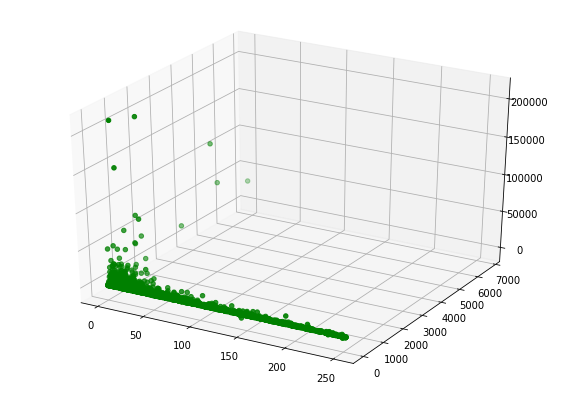

In [20]:
# Creating figure for visualization
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(rfm_normalized["Recency"], rfm_normalized["Frequency"], rfm_normalized["Monetary"], color = "green")
plt.show()

In [24]:
X = rfm_normalized[['Monetary', 'Frequency', 'Recency']]

In [26]:
#Building the clustering model and calculating the values of the Distortion and Inertia

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
# We dont consider k = 1,2 as they are of no significance
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(rfm_normalized, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(rfm_normalized, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [27]:
# tabulating dictionary results
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 1683.0834248401475
2 : 1426.6527624190376
3 : 1178.1236855435448
4 : 1114.738173373841
5 : 789.7566571430514
6 : 729.1222143417505
7 : 583.0752756725776
8 : 561.2117254905148
9 : 438.1364522392409


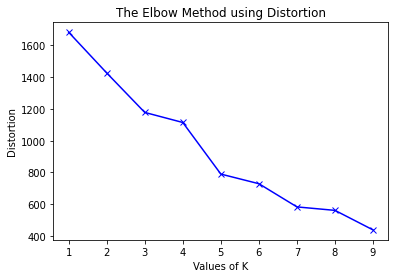

In [28]:
#visualizing these results
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [29]:
#using inertia values

for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 173810113952.00653
2 : 57396043823.58237
3 : 25813605125.668266
4 : 16994607262.828468
5 : 10047314832.424532
6 : 7611504575.442034
7 : 5425830678.858219
8 : 3748703648.0867434
9 : 2820952501.5478477


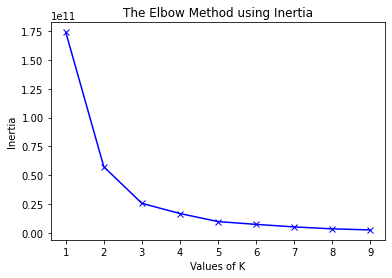

In [30]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Q5: Create the customer segments with K-means algorithm by using number of clusters is 
suggested by elbow method.

In [32]:
#model creation for k=4

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_normalized)
labels = kmeans.labels_
print(kmeans.labels_)

[0 0 0 ... 0 0 0]


In [38]:
rfm_normalized['Cluster_Id'] = labels
rfm_normalized.head()

,CustomerID,Monetary,Frequency,Recency,Cluster_Id
0,12347.0,3122.82,122,1,0
1,12348.0,677.00,8,74,0
2,12349.0,1757.55,73,18,0
3,12352.0,944.23,47,35,0
4,12353.0,89.00,4,203,0


Q6:Plot the clusters in a scatter plot and mark each segment differently using lmplot.

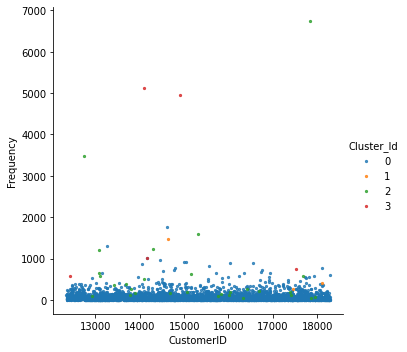

In [39]:
#lmplot = linear model plot

sns.lmplot(x ='CustomerID', y ='Frequency',
          fit_reg = False, hue = 'Cluster_Id',
          data = rfm_normalized,
          scatter_kws = {'s' : 5})

# Show the plot
plt.show()

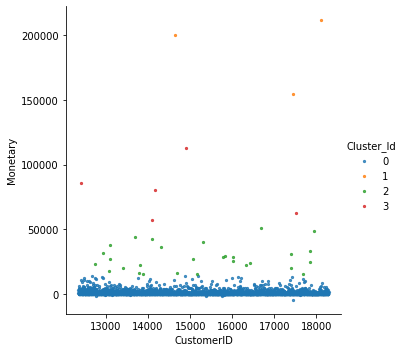

In [42]:
#Amount

sns.lmplot(x ='CustomerID', y ='Monetary',
          fit_reg = False, hue = 'Cluster_Id',
          data = rfm_normalized,
          scatter_kws = {'s' : 5})

# Show the plot
plt.show()

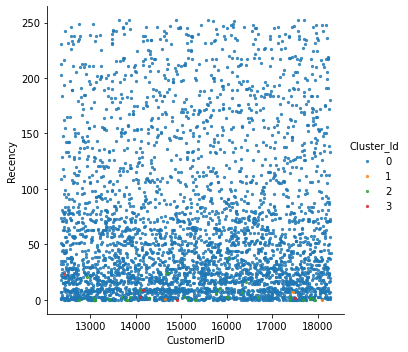

In [43]:
#Recency

sns.lmplot(x ='CustomerID', y ='Recency',
          fit_reg = False, hue = 'Cluster_Id',
          data = rfm_normalized,
          scatter_kws = {'s' : 5})

# Show the plot
plt.show()

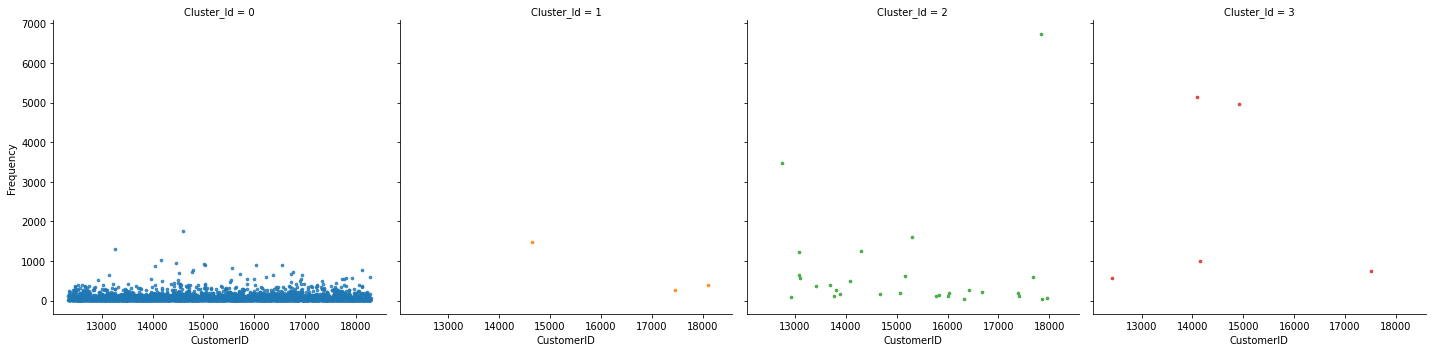

In [44]:
#subplots of each cluster

sns.lmplot(x ='CustomerID', y ='Frequency',
          fit_reg = False, hue = 'Cluster_Id',
          data = rfm_normalized,
          col = 'Cluster_Id',
          scatter_kws = {'s' : 7})

# Show the plot
plt.show()

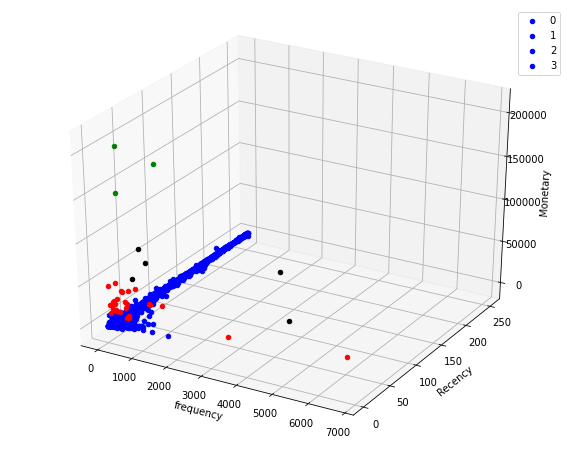

In [48]:
#using matplotlib on final

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111,projection='3d')

colors = ['blue', 'green', 'red', 'black']
for i in range(len(rfm_normalized)):
    x, y, z = rfm_normalized.iloc[i]['Frequency'], rfm_normalized.iloc[i]['Recency'], rfm_normalized.iloc[i]['Monetary']
    ax1.scatter(x, y, z, c=colors[int(rfm_normalized.iloc[i]['Cluster_Id'])])

ax1.set_xlabel('frequency')
ax1.set_ylabel('Recency')
ax1.set_zlabel('Monetary')   

ax1.legend('0123')
plt.show()



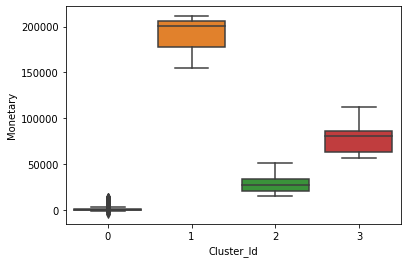

In [49]:
# boxplot for further EDA
sns.boxplot(x='Cluster_Id', y='Monetary', data=rfm_normalized)

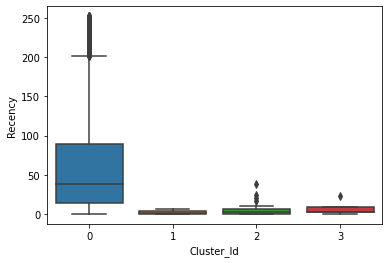

In [50]:
#recency
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_normalized)

Q7:Print the cluster centers of each customer segment and explain them intuitively.

In [51]:
centers = kmeans.cluster_centers_
# 3d points of the 4 clusters

Text(0.5, 0, 'Recency')

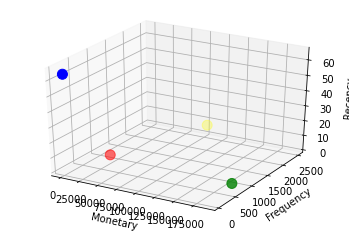

In [53]:
ax = plt.axes(projection ="3d")

ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], c=['blue','green','red','yellow'], s=100)
ax.set_xlabel('Monetary')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

Q8:Create the customer segments with Agglomerative algorithm by using number of clusters 
is suggested by elbow method.


In [54]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
ACModel = AgglomerativeClustering(n_clusters = 4)
y_ACModel = ACModel.fit_predict(rfm_normalized)
y_ACModel

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Number of data points in each cluster (based on Agglomerative Clustering)')

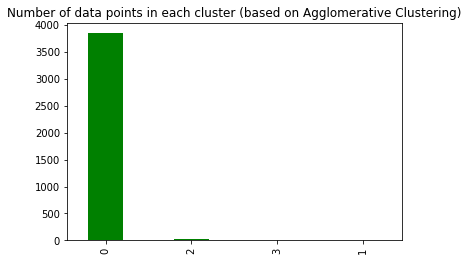

In [58]:
#Plotting the distribution

rfm_normalized['Agglo_Label'] = y_ACModel
rfm_normalized['Agglo_Label'].value_counts().plot.bar(width=0.4, color = 'g')
plt.title('Number of data points in each cluster (based on Agglomerative Clustering)')

**Q9) Visualize the clusters using the dendrogram.**

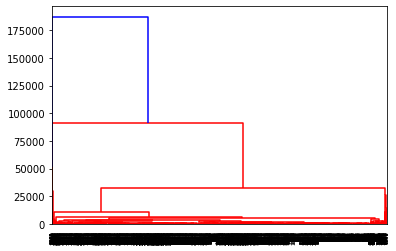

In [61]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(rfm_normalized, method='average'))

In [66]:
#running the model with k=3
ACModel2 = AgglomerativeClustering(n_clusters = 3)
y_ACModel2 = ACModel.fit_predict(rfm_normalized)
y_ACModel2

array([0, 0, 0, ..., 0, 0, 0])

Text(0.5, 1.0, 'Number of data points in each cluster (based on Agglomerative Clustering)')

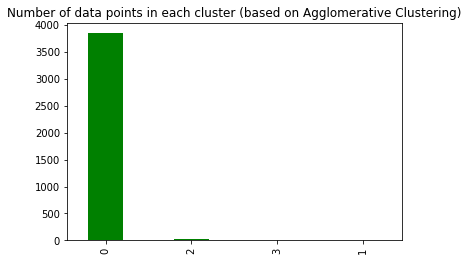

In [67]:
#Plotting the distribution

rfm_normalized['Agglo_Label2'] = y_ACModel2
rfm_normalized['Agglo_Label2'].value_counts().plot.bar(width=0.4, color = 'g')
plt.title('Number of data points in each cluster (based on Agglomerative Clustering)')

Q10: Compare the clusters obtained using KMeans vs. Agglomeration. 

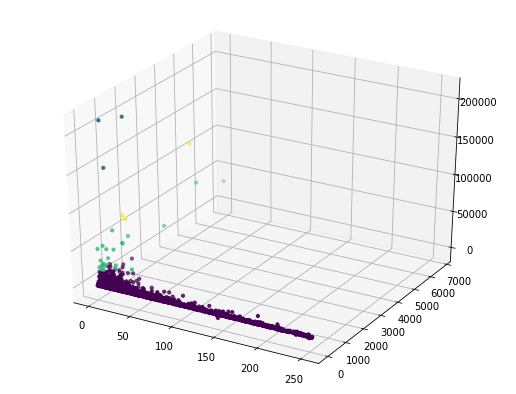

In [69]:
#agglomerative clustering
fig = plt.figure(figsize=(9, 7))
ax_agg=plt.axes(projection = "3d")
ax_agg.scatter3D(rfm_normalized['Recency'], rfm_normalized['Frequency'], rfm_normalized['Monetary'], c=y_ACModel2, s=10 )
plt.show()